### decision Tree builing on wine quality data set and diabetes dataset

In [1]:
import pandas as pd
import numpy as np

In [98]:
##reading the data form same folder
df=pd.read_csv('winequality-red.csv',sep=';')

In [99]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [100]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [101]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [103]:
df.duplicated().sum()

240

In [104]:
df.drop_duplicates(inplace=True)

In [105]:
df.duplicated().sum()

0

In [108]:
# selecting the independent and dependent variables
X=df.drop(columns='quality')

In [109]:
y=df['quality']

In [114]:
#splitting Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [115]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
model=DecisionTreeClassifier()

In [116]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [117]:
y_pred=model.predict(X_test)

In [121]:
# finding out the model score: training score
from sklearn.metrics import accuracy_score
model.score(X_train,y_train)

1.0

In [123]:
# Testing Score
model.score(X_test,y_test)

0.4766146993318486

In [124]:
model.score(X_test,y_pred)

1.0

[Text(0.49278846153846156, 0.9166666666666666, 'x[10] <= 10.15\ngini = 0.652\nsamples = 910\nvalue = [5, 38, 385, 354, 115, 13]'),
 Text(0.27884615384615385, 0.75, 'x[6] <= 91.5\ngini = 0.53\nsamples = 462\nvalue = [4, 24, 288, 129, 15, 2]'),
 Text(0.15384615384615385, 0.5833333333333334, 'x[1] <= 0.417\ngini = 0.575\nsamples = 377\nvalue = [4, 23, 212, 121, 15, 2]'),
 Text(0.07692307692307693, 0.4166666666666667, 'x[9] <= 0.655\ngini = 0.622\nsamples = 84\nvalue = [0, 2, 30, 41, 9, 2]'),
 Text(0.038461538461538464, 0.25, 'x[4] <= 0.079\ngini = 0.52\nsamples = 47\nvalue = [0, 1, 24, 22, 0, 0]'),
 Text(0.019230769230769232, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.057692307692307696, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.11538461538461539, 0.25, 'x[6] <= 31.5\ngini = 0.647\nsamples = 37\nvalue = [0, 1, 6, 19, 9, 2]'),
 Text(0.09615384615384616, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1346153846153846, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.23076923076923078

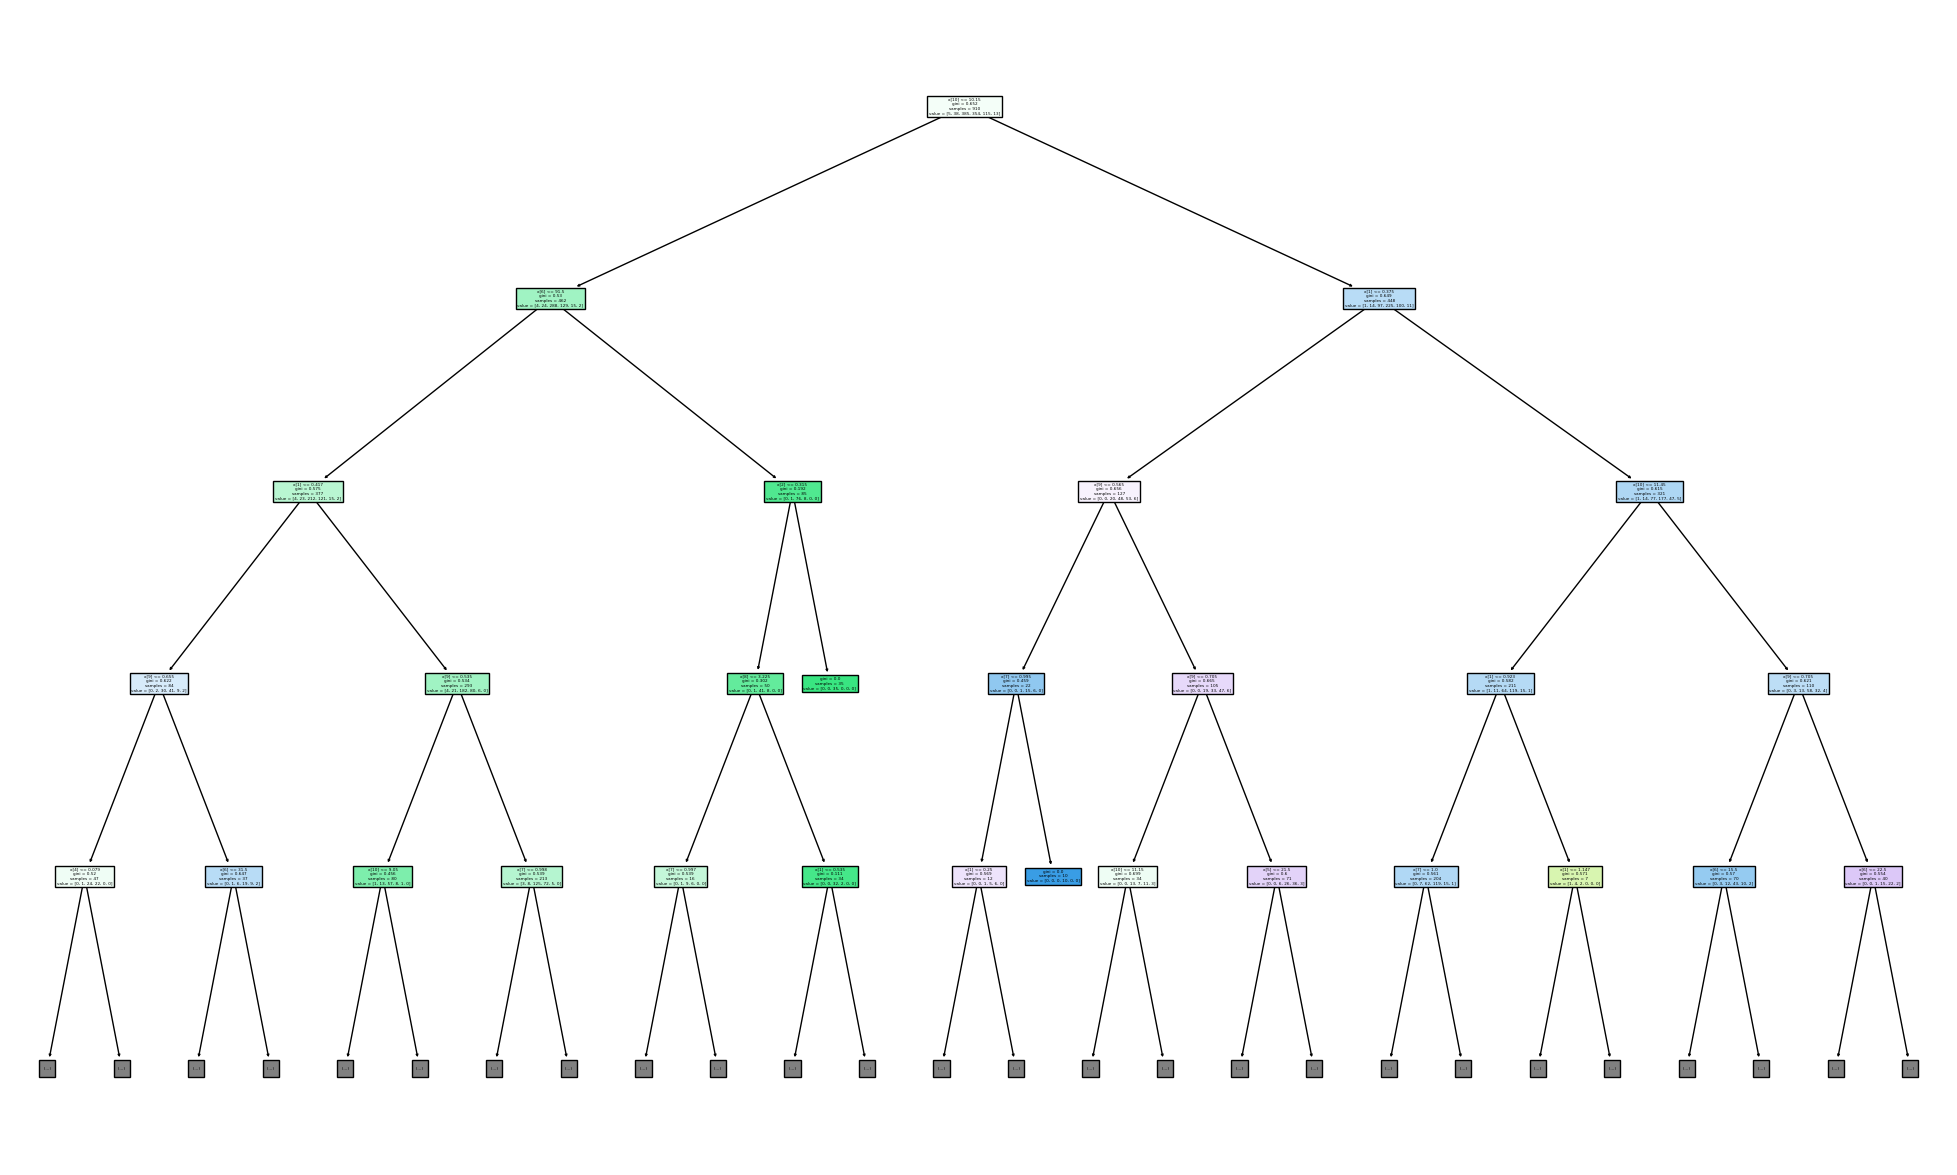

In [125]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))  
tree.plot_tree(model,filled=True, max_depth=4)

In [126]:
fig.savefig("decision Tree_Classifier.png")

In [28]:
# reading the diabetes data from the system

df1=pd.read_csv(r'C:\Users\ravi5\OneDrive\Desktop\Data Science\DTC excercise1.csv')

In [127]:
df2=pd.read_csv(r'C:\Users\ravi5\Machine Learning\Diabetes_clean.csv')

In [128]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               638 non-null    int64  
 1   Glucose                   638 non-null    float64
 2   BloodPressure             638 non-null    float64
 3   SkinThickness             638 non-null    float64
 4   Insulin                   638 non-null    float64
 5   BMI                       638 non-null    float64
 6   DiabetesPedigreeFunction  638 non-null    float64
 7   Age                       638 non-null    int64  
 8   Outcome                   638 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 45.0 KB


In [129]:
# importing necessary packages
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [131]:
# setting the input and Target Variable
X=df2.drop(columns='Outcome')
y=df2['Outcome']

In [132]:
# importing train test split 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [133]:
# Building the model and checking the Accuracy of the model
model_tree=DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_train_pred=model_tree.predict(X_train)
y_test_pred=model_tree.predict(X_test)
training_accuracy=accuracy_score(y_train, y_train_pred)
print(f"accuracy of the training data : {accuracy_score(y_train, y_train_pred)}")


print(f'accuracy of the testing data {accuracy_score(y_test, y_test_pred)}')

accuracy of the training data : 1.0
accuracy of the testing data 0.7014218009478673


[Text(0.5447048611111112, 0.9545454545454546, 'x[1] <= 127.5\ngini = 0.429\nsamples = 427\nvalue = [294, 133]'),
 Text(0.2942708333333333, 0.8636363636363636, 'x[7] <= 28.5\ngini = 0.29\nsamples = 301\nvalue = [248, 53]'),
 Text(0.16319444444444445, 0.7727272727272727, 'x[6] <= 1.28\ngini = 0.128\nsamples = 174\nvalue = [162, 12]'),
 Text(0.14930555555555555, 0.6818181818181818, 'x[5] <= 45.4\ngini = 0.119\nsamples = 173\nvalue = [162, 11]'),
 Text(0.13541666666666666, 0.5909090909090909, 'x[6] <= 0.666\ngini = 0.11\nsamples = 172\nvalue = [162, 10]'),
 Text(0.0763888888888889, 0.5, 'x[5] <= 30.95\ngini = 0.066\nsamples = 146\nvalue = [141, 5]'),
 Text(0.0625, 0.4090909090909091, 'gini = 0.0\nsamples = 82\nvalue = [82, 0]'),
 Text(0.09027777777777778, 0.4090909090909091, 'x[5] <= 31.1\ngini = 0.144\nsamples = 64\nvalue = [59, 5]'),
 Text(0.0763888888888889, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.10416666666666667, 0.3181818181818182, 'x[0] <= 0.5\ngini 

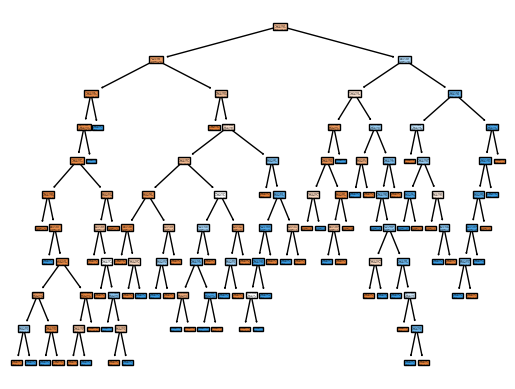

In [134]:
tree.plot_tree(model_tree, filled=True)

In [135]:
'''Hyper premeter Tuning for the Decision Tree CLassifier '''
from sklearn.model_selection import GridSearchCV


In [136]:
# finding out best parameters with Grid search CV
grid_prameters={ 'criterion':['gini', 'entropy'],
                'splitter':['best', 'random'],
                'max_depth':[4,5,6,7,8,9,10],
                'min_samples_split':[3,4,5,6,7,8,9],
                'min_samples_leaf':[2,3,4,5,6]
}
grid_search=GridSearchCV(estimator=model_tree, param_grid=grid_prameters,cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']})

In [137]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 8,
 'splitter': 'random'}

In [139]:
# building the model with the hyperparameter Tuning
model_tree=DecisionTreeClassifier(
                                  criterion= 'gini', 
                                  max_depth= 9, 
                                  min_samples_leaf= 2,
                                  min_samples_split= 9,
                                  splitter= 'random')
model_tree.fit(X_train, y_train)
y_train_pred=model_tree.predict(X_train)
y_test_pred=model_tree.predict(X_test)
training_accuracy=accuracy_score(y_train, y_train_pred)
print(f"accuracy of the training data : {accuracy_score(y_train, y_train_pred)}")


print(f'accuracy of the testing data {accuracy_score(y_test, y_test_pred)}')

accuracy of the training data : 0.8477751756440282
accuracy of the testing data 0.7393364928909952
